# **FUEL EFFICIENCY PREDICTION USING MACHINE LEARNING**

## ***INTRODUCTION***

This notebook contains the following coloumns : **mpg, cylinders, horsepower, weight, accelaration**.

**Displacement** is the voloume of the car's engine, usually expressed in liters or cube centimeters (cc).

**Origin** is a discrete value from 1 - 3, For this project we assumed 1 to be American origin vehicle, 2 is European-origin and 3 is Asia/else where.

**The Model year** is given as a decimal number representing the last two digits of 4 digit year.


## ***Data preprocessing***

The purpose of the data preprocessing is to minimize potential errors in the model as much as possible.

In [1]:
from pandas.core.dtypes.common import pandas_dtype
import pandas as pd
import numpy as np

df = pd.read_csv("auto-mpg-3.csv")
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name          int64
dtype: object

In [2]:
df['car name'].astype(float)
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name          int64
dtype: object

First, lets check and see the null values for this dataset.**Null Values** are empty, useless entries within our dataset that we don't need.If we skip removing null values our model will be inaccurate.

In [3]:
print("Presence of null values:" + str(df.isnull().values.any()))

Presence of null values:False


Now that we've scaled the data and labeled all the categorical features, let's analyze our dataset.

## ***EDA(Explotory Data Analysis)***

The purpose of EDA is to enhance our understanding of trends in the dataset without involving complicated machine learning models.

We've completed the necessary preprocessing steps, so let's create a correlation map to see the relation between different coloumns of the dataset.

We should import Seaborne's heat map and plot the correlation map for this dataset.

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

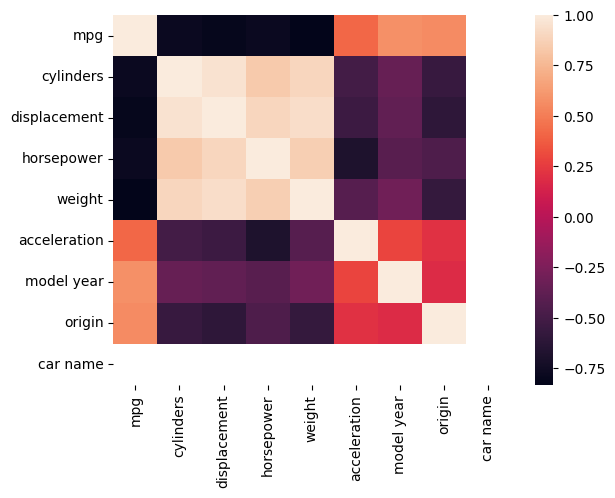

In [5]:
corr = df.corr()
sns.heatmap(corr)
plt.show()

There are some strong correlations between each coloumn. For cylinders, displacement, Horsepower and weight, it makes sense that mpg would be negatively correlated with rising trends in any of the named features.

Since non-American / European countries may contain more fuel-efficient standards due to different fuel prices in those areas.We are assuming that different regions have different fuel efficiency priorities, so our model will be skewed towards the region with the most cars in the dataset.

Next, We can plot the number of cars based on their origin(US = 1, Europe = 2, Asia = 3)

<Axes: >

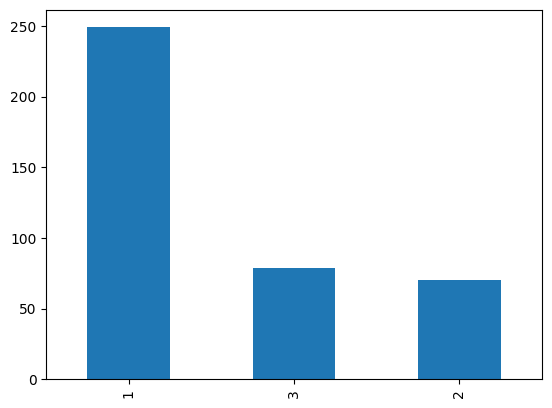

In [6]:
pd.value_counts(df['origin']).plot.bar()

With corresponding to american cars, we can see that the US accounts for majority of the cars produced here.

**Distribution of different cylinder counts among our dataset:-**

<Axes: >

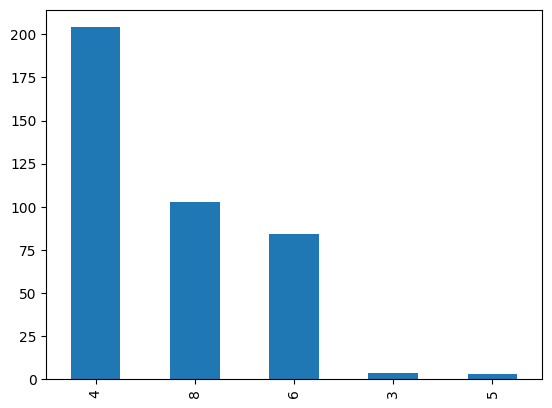

In [7]:
pd.value_counts(df['cylinders']).plot.bar()

Since the dataset uses pre-2000s cars, it makes sense how 4-cylinder cars are extremely popular.As time went on the popularity of the SUV led to more cars having 6-8 cylinders in their cars.

<Axes: xlabel='origin', ylabel='mpg'>

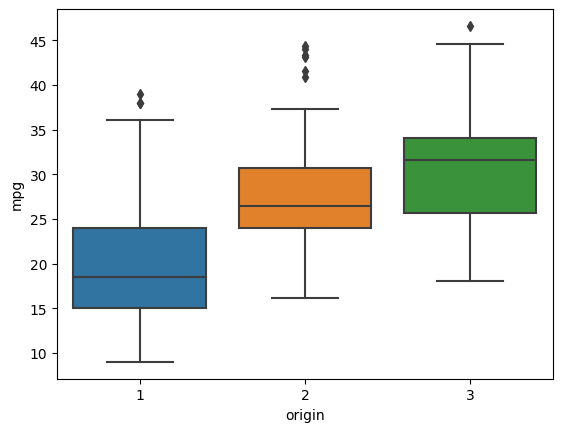

In [8]:
sns.boxplot(x='origin',y='mpg',data = df)

From the box plot we can see that Asian cars often have significantly higher mpg than American/European cars, This may be a contributing factor as to why japaneas cars dominated the automotive indutry during that time period.

We have done some exploration of our data, and now let's build our regression model to see how well we can predict the fuel efficiency.

## ***Model Training***

In this section, we will be creating and trainig our model for predicting what a car's MPG will be. Since there are multiple algorithms we can use to build our model, we will compare the accuracy scores after testing and pick the most accurate algorithm.

Now let's initiate our different regression algorithms.Then,we train them and check the accuracy of the training set.

In [9]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

From the list,we are using XGBoost,Decision Tree,Random Forest and KNeighborsRegressor to perform our predictions. We will then see which algorithm produces the highest accuracy and select it as our algorithm of choice for future use.

Our testing will take 3 phases:

1.   Training
2.   Testing
3.   Validation

Let’s perform the splitting of our data into test, train, and validation using **train_test_split**.

In [10]:
from IPython.testing import test 
from sklearn.model_selection import train_test_split
training,test = train_test_split(df,train_size = 0.7, test_size = 0.3, shuffle = True)
training, valid = train_test_split(training, train_size = 0.7, test_size=0.3, shuffle=True)
training_label = training.pop('mpg')
test_label = test.pop('mpg')
valid_label = valid.pop('mpg')

We 'pop' the MPG label as that is what we are trying to predict. Popping simply gives the MPG values as a list, making it easier to use for the Accuracy calculations.

Training is first, and it’s where our model generates “intuition” about how to approach fraudulent and not fraudulent transactions.

In [11]:
xgb = XGBRegressor()
dtc = DecisionTreeRegressor()
rfc = RandomForestRegressor()
knn = KNeighborsRegressor(n_neighbors=3)

In [12]:
xgb.fit(training, training_label)
dtc.fit(training, training_label)
rfc.fit(training, training_label)
knn.fit(training, training_label)

KNeighborsRegressor(n_neighbors=3)

In [13]:
KNeighborsRegressor(algorithm='auto',leaf_size=30,metric='minkowski',metric_params=None, n_jobs=None,n_neighbors=3,p=2,weights='uniform')

KNeighborsRegressor(n_neighbors=3)

## ***Testing the Model***

The testing phase is where we see how the model performs against data where we know the outcome.

The algorithms will perform differently.From this phase, we generate an accuracy score to compare the different algorithms.

below is the code for testing our mpg model :

In [14]:
xgb_predict = xgb.predict(test[training.columns])
dtc_predict = dtc.predict(test[training.columns])
rfc_predict = rfc.predict(test[training.columns])
knn_predict = knn.predict(test[training.columns])

In [15]:
from sklearn.metrics import mean_squared_error
import math
accuracy = dict()
accuracy['XGBoost'] = math.sqrt(mean_squared_error(test_label, xgb_predict)) 
accuracy['DecisionTree'] = math.sqrt(mean_squared_error(test_label,dtc_predict))
accuracy['RandomForest'] = math.sqrt(mean_squared_error(test_label,rfc_predict))
accuracy['KNN'] = math.sqrt(mean_squared_error(test_label,knn_predict))
print(accuracy)

{'XGBoost': 2.99591253273631, 'DecisionTree': 3.405901740606541, 'RandomForest': 2.826344336476596, 'KNN': 4.331335009320217}


## ***Valid Testing***

Validation testing is how we check that the model isn’t overfitting to our specific dataset. Overfitting is when the model starts to develop an intuition that is too specific to the training set.

Overfitting is a problem because our model is no longer flexible. It may work on the initial set, but subsequent uses will cause our model to fail. Continuing the exam analogy, the validation testing phase is like another version of the exam with different questions.

These results for the testing set match what others have achieved for this dataset. With some additional fine-tuning, we can lower the RMSE even further. Let’s run our validation testing, and see what our RMSE values are.

In [16]:
xgb_predict = xgb.predict(valid) 
dtc_predict = dtc.predict(valid) 
rfc_predict = rfc.predict(valid) 
knn_predict = knn.predict(valid)
accuracy['XGBoost'] = math.sqrt(mean_squared_error(valid_label, xgb_predict)) 
accuracy['DecisionTree'] = math.sqrt(mean_squared_error(valid_label,dtc_predict))
accuracy['RandomForest'] = math.sqrt(mean_squared_error(valid_label,rfc_predict))
accuracy['KNN'] = math.sqrt(mean_squared_error(valid_label,knn_predict))
print(accuracy)

{'XGBoost': 3.8886180415584, 'DecisionTree': 4.377336110989358, 'RandomForest': 3.687521928909775, 'KNN': 5.0193593469653335}


It seems that our model may not be overfitting to our dataset, which is good. While validation testing doesn’t completely eliminate the chance of overfitting, it gives us some confidence for when our model handles new data.

Note that verification doesn’t completely disprove or prove to overfit, but the testing does give insight into it.

Let’s make a DataFrame to view our predicted car fuel efficiency versus the actual mpg.

In [17]:
results = pd.DataFrame({'label mpg': valid_label, 'prediction': dtc.predict(valid)})
results.head()

,label mpg,prediction
292,18.5,20.2
62,13.0,14.0
176,19.0,19.0
9,15.0,14.0
352,29.9,30.9


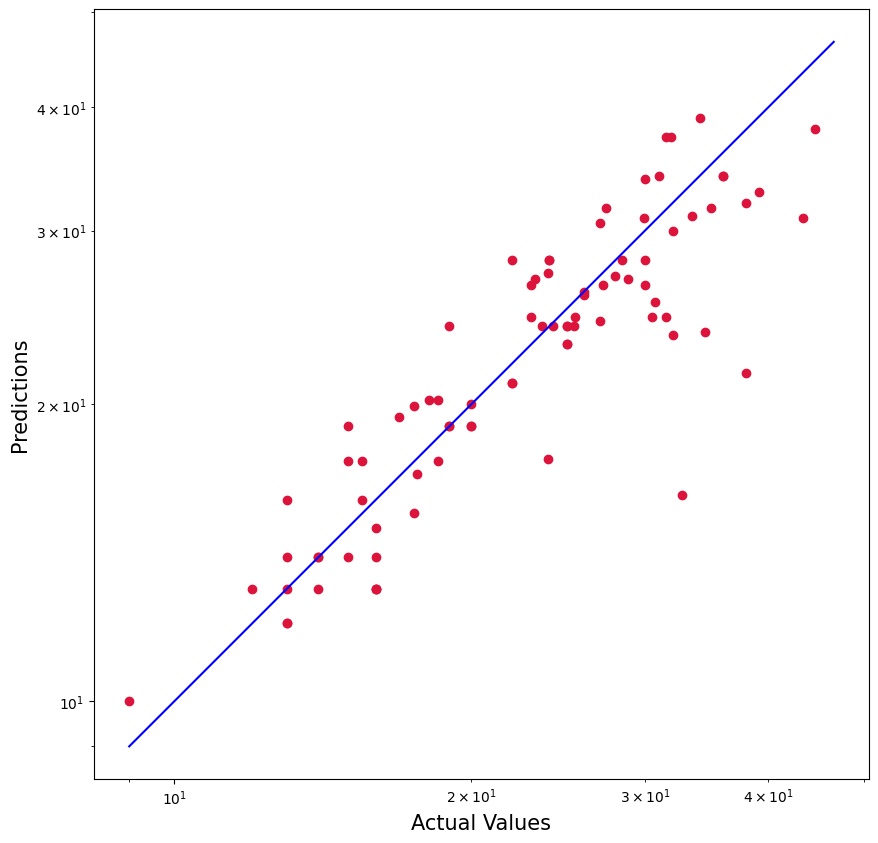

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(valid_label, dtc.predict(valid), c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(valid_label), max(test_label))
p2 = min(min(valid_label), min(test_label))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [19]:
results = pd.DataFrame({'label mpg': valid_label, 'prediction': xgb.predict(valid)})
results.head()

,label mpg,prediction
292,18.5,14.889587
62,13.0,14.055241
176,19.0,18.541763
9,15.0,14.649889
352,29.9,28.164129


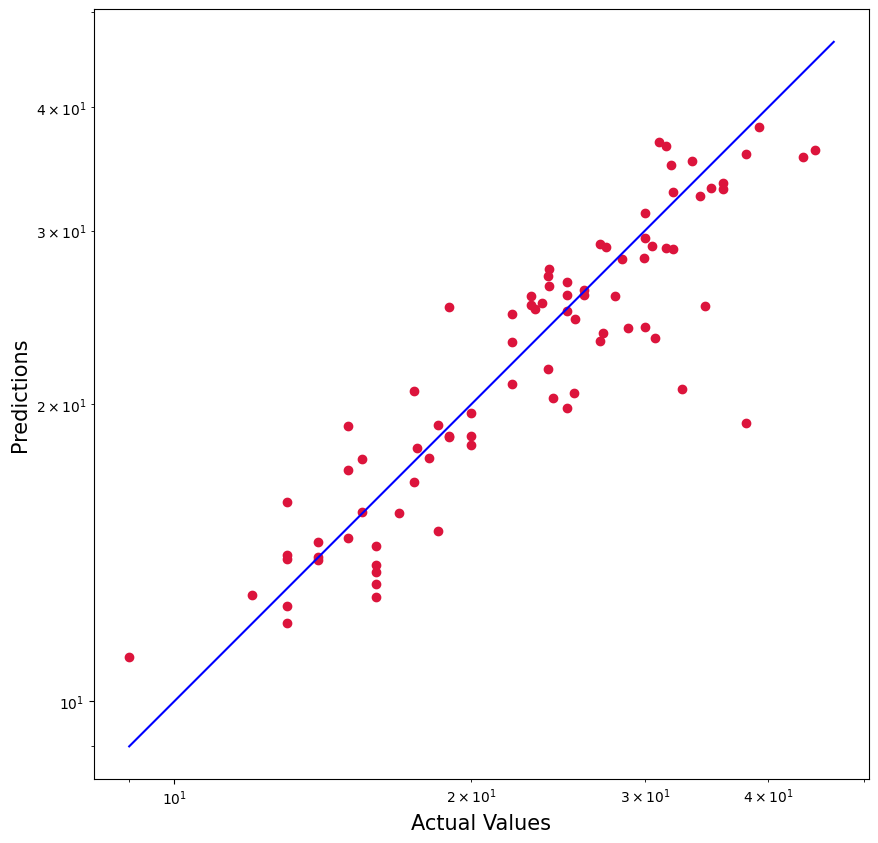

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(valid_label, xgb.predict(valid), c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(valid_label), max(test_label))
p2 = min(min(valid_label), min(test_label))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [21]:
results = pd.DataFrame({'label mpg': valid_label, 'prediction': rfc.predict(valid)})
results.head()

,label mpg,prediction
292,18.5,17.109
62,13.0,13.670
176,19.0,19.598
9,15.0,14.360
352,29.9,31.988


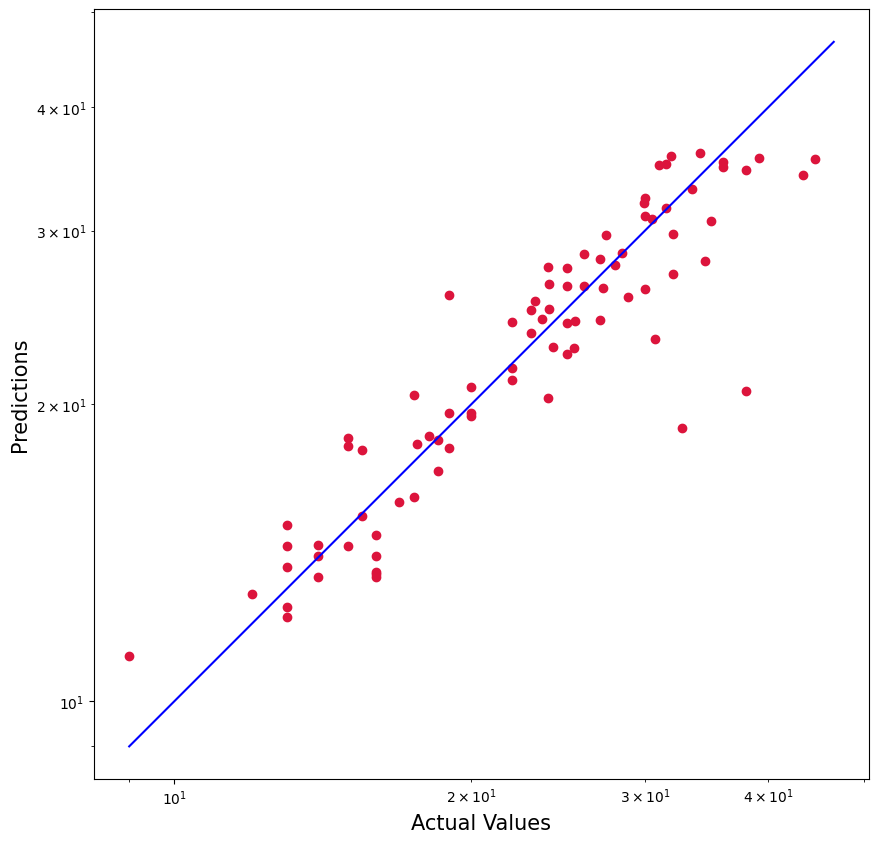

In [22]:
plt.figure(figsize=(10,10))
plt.scatter(valid_label, rfc.predict(valid), c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(valid_label), max(test_label))
p2 = min(min(valid_label), min(test_label))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [23]:
results = pd.DataFrame({'label mpg': valid_label, 'prediction': knn.predict(valid)})
results.head()

,label mpg,prediction
292,18.5,16.166667
62,13.0,14.000000
176,19.0,20.966667
9,15.0,15.666667
352,29.9,25.333333


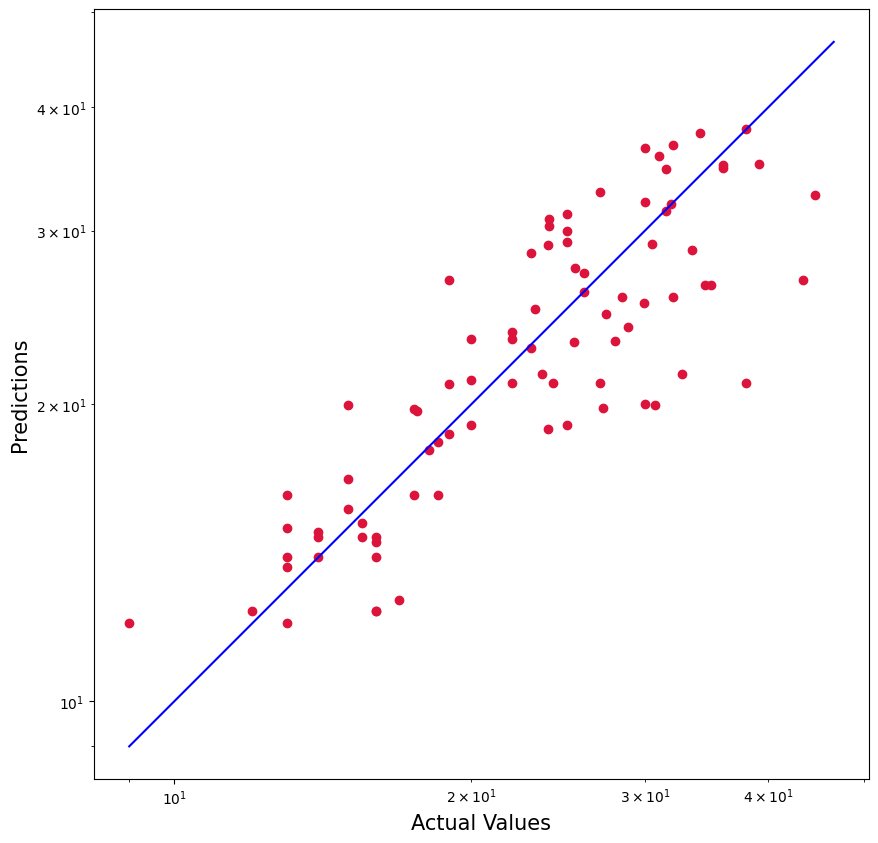

In [24]:
plt.figure(figsize=(10,10))
plt.scatter(valid_label, knn.predict(valid), c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(valid_label), max(test_label))
p2 = min(min(valid_label), min(test_label))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

From the above table, our model is decently accurate at predicting the mpg of a car. Even though there is some error, generally, it is accurate enough to be reasonable to use for prediction.



Even after normalizing the amount of cars per region, the errors generally do not improve much. One problem is that the data contains incorrect mpg values for some of the cars.

Looking up many of the cars where there are high error rates reveals vastly different mpg ratings than what is listed in our dataset.

Therefore, our model performs very well overall, and big gaps in mpg are usually due to the data itself being incorrect.

Below is a plot of the performance of the various algorithms:

,Algorithms,Percentage
0,XGBoost,3.888618
1,DecisionTree,4.377336
2,RandomForest,3.687522
3,KNN,5.019359


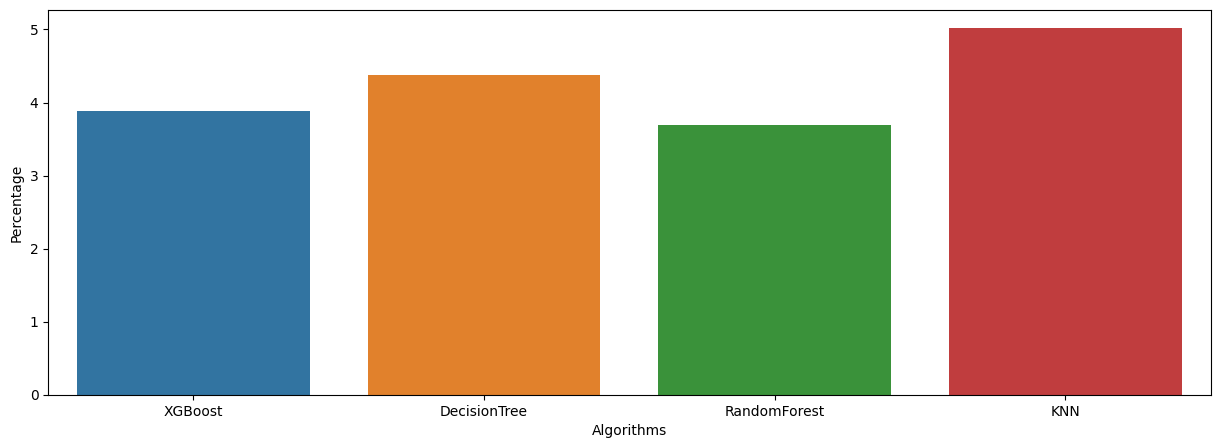

In [25]:
fig, (ax1) = plt.subplots(ncols=1, sharey=True,figsize=(15,5))
new_df=pd.DataFrame(list(accuracy.items()),columns=['Algorithms','Percentage'])
display(new_df)
sns.barplot(x="Algorithms", y="Percentage", data=new_df,ax=ax1);

In [26]:
max_accuracy = min(accuracy,key=accuracy.get)
max_accuracy

'RandomForest'

Again, Random Forest is performing the best, with an RMSE value of 2.5 mpg. While we are picking XGBoost for future predictions, remember that different algorithms tax different resources.

The results tell us that our model is decently reliable for the dataset.

Even though some predictions are far away from the actual value, further inspection of the dataset leads me to believe that some of the mpg values are wildly inaccurate.
However, we also don’t have much data to work with, so we chose to keep the incorrect values and replace the outliers with the actual values as we encounter them.

## ***Conclusion***

During this project, we built a model that could reliably predict car fuel efficiency.

This model could be trained with newer car data and be used to predict competitors’ future mpg ratings for upcoming cars, allowing companies to potentially resources currently used on R&D today on making more efficient, more popular vehicles that outshine competitors.

While our model may be inaccurate in some cases, we talked about how our dataset can contain inaccurate values for the mpg, and oftentimes, our predictions are more accurate than the values in the dataset.

For newer cars, the collected data is significantly more reliable, so our model will be able to perform better with a different, more accurate dataset.